# Libraries

In [368]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import matplotlib.ticker as plticker
from matplotlib import rc #for latex use on the plots
from matplotlib import ticker  # for labels formattings
%matplotlib inline

# Plot Configs

In [369]:
plt.style.use('ggplot')
perso_linewidth = 0.6
# This will change your default rcParams
def init_plotting():
    plt.rcParams['figure.figsize'] = (40,20)
    plt.rcParams['font.size'] = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    #plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['axes.linewidth'] = perso_linewidth
    plt.rcParams['savefig.dpi'] = '300'
    plt.rcParams['savefig.format'] = 'pdf'
    plt.rcParams['axes.facecolor'] = '#D3D3D3'
    plt.rcParams['axes.edgecolor'] = '0'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color']='white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = '0.4'
    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['legend.edgecolor'] = 'black'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['lines.markersize']= 18 
    plt.rcParams['lines.markeredgewidth']= '0.1'
    plt.rcParams['lines.color']= 'r' 
    plt.rcParams['lines.marker']= 'o' 
    plt.rcParams['lines.linestyle']= '-' 
    plt.rcParams['xtick.color']= '0'
    plt.rcParams['ytick.color']= '0'
    #plt.rcParams['axes.color_cycle']= ['#3778bf', '#feb308', '#a8a495', '#7bb274', '#825f87']
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['right'].set_visible('False')
    plt.gca().spines['top'].set_visible('False')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')
    plt.rcParams['ytick.minor.size']= 1.5
    plt.rcParams['ytick.major.width']= perso_linewidth
    plt.rcParams['ytick.minor.width']= perso_linewidth
    plt.rcParams['xtick.major.width']= perso_linewidth
    plt.rcParams['xtick.minor.width']= perso_linewidth

init_plotting()

plt.close() # this line to avoid an empty plot showing up

### Centering the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Gillespie's Direct Algorithm

## Simple SIS model

\begin{itemize}
\item $E_1:X \rightarrow X+1,Y \rightarrow Y-1$
\item $E_2:X \rightarrow X-1,Y \rightarrow Y+1$
\end{itemize}

### Function: Gillepsie Direct

In [370]:
def Gillepsie2(X0,Y0,Beta,Gamma):
    N=X0+Y0
    r1=(Beta*X0*Y0)/N
    r2=Gamma*Y0
    r_t=r1+r2
    rnd1=random.random()
    dt=(-1/r_t)*np.log(rnd1)
    rnd2=random.random()
    P=rnd2*r_t
      
    l1=np.zeros(1)
    l1=np.append(l1,r1)
    l1=np.append(l1,r2)
    l2=np.cumsum(l1)
    
    event_to_shoot=np.where(l2>=P)[0][0]
    
    if event_to_shoot==1:
        X1=X0-1
        Y1=Y0+1
    if event_to_shoot==2:
        X1=X0+1
        Y1=Y0-1
    return X1,Y1,dt

In [371]:
def Gillepsie(Params,R,E):
    r_t=sum(R)
    #print("R_totoal=",r_t)
    
    
    rnd1=random.random()
    dt=(-1/r_t)*np.log(rnd1)
    rnd2=random.random()
    P=rnd2*r_t

      
    l1=np.append([0],R)
    l2=np.cumsum(l1)
    
    
    
    event_to_shoot=np.where(l2>=P)[0][0]-1
    
    Params=Params+E[event_to_shoot]
    return Params,dt    

In [372]:
### Define initial values, constant values and parameters
Beta=0.03
Gamma=1/100
X0=30
Y0=70
N=X0+Y0


X=np.array([X0])
Y=np.array([Y0])
###


t=np.array([0])

for i in range(5000):
    R=np.zeros(0)
    E=np.zeros(0)
    
    ### Define Variables
    Params=[X[i],Y[i]]
    
    ### Define Rates
    R=np.append(R,[(Beta*X[i]*Y[i])/N])
    R=np.append(R,[Gamma*Y[i]])
    
    ### Define Events
    E=np.append(E,[-1,1])
    E=np.vstack((E,[1,-1]))
    
    Params=[X[i],Y[i]]
    
    
    [x,y],dt=Gillepsie(Params,R,E)
    
    X=np.append(X,x)
    Y=np.append(Y,y)
    t=np.append(t,t[i]+dt)




## Input Values

In [373]:
Beta=0.03
Gamma=1/100

t4=np.array([0])
X4=np.array([30])
Y4=np.array([70])

### Gillepsie Direct Results

In [374]:
for i in range(5000):
    x,y,dt=Gillepsie2(X4[i],Y4[i],Beta,Gamma)
    X4=np.append(X4,x)
    Y4=np.append(Y4,y)
    t4=np.append(t4,t4[i]+dt)
    
    

## Book results

In [375]:
import pylab as pl
beta=0.03
gamma=1/100.0
Y0=70.0
N0=100.0
ND=MaxTime=10*365.0;


INPUT = Y0

timestep=0.0

def stoc_eqs(INP,ts):  
	Z=INP
	Rate1 = beta*(N0-Z)*Z/N0
	Rate2 = gamma*Z
	R1=pl.rand()
	R2=pl.rand()
	ts = -np.log(R2)/(Rate1+Rate2)
	if R1<(Rate1/(Rate1+Rate2)):
		Z += 1;  # do infection
	else:
		Z -= 1;  # do recovery
	return [Z,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	RES=[0]
	while T[lop] < ND and INPUT > 0:
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1]+ts)
		RES.append(INPUT)
		lop=lop+1
		T.append(T[lop-1])
		RES.append(res)
		INPUT=res
	return [RES, T]

[RES,t2]=Stoch_Iteration(INPUT)

t2=np.array(t2)
RES=np.array(RES)

## Plots

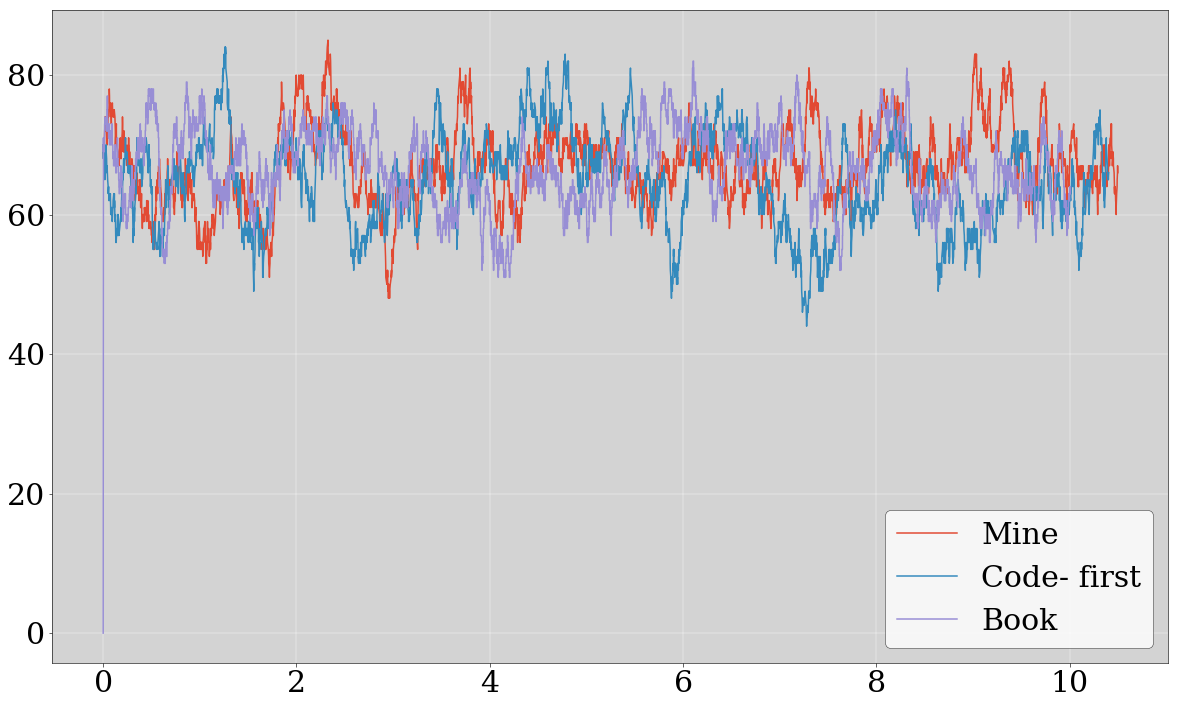

In [376]:
fig1=plt.figure(figsize=(20,12))
ax1=plt.subplot(111)
plt.plot(t/365,Y,'-',label='Mine')
plt.plot(t4/365,Y4,'-',label='Code- first')
plt.plot(t2/365., RES,'-',label='Book')
#plt.ylim((40,85))
plt.legend()
plt.show()